# Gradient descent

In [1]:
#Author: Alexander Eckert(aeck@de.ibm.com)
#code adapted from https://am207.github.io/2017/wiki/gradientdescent.html

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 
from sklearn.datasets.samples_generator import make_regression

In [2]:
# Generate sample data for regression
x, y = make_regression(n_samples = 150, 
                       n_features = 1, 
                       n_informative = 1, 
                       noise = 100,
                       random_state = 42)

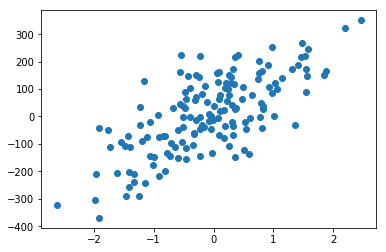

In [3]:
# Plot data
plt.plot(x, y, 'o')

Our hypothesis: $h_\theta(x) = \theta_0 + \theta_1 x$

Our cost function is the mean squared error (MSE): $\frac{1}{m} \sum_{i=1}^{m} (Y_i - \hat{Y_i})^2$

For "small" number of features $n$ normal equations can be used to fit the model $\theta = (X^TX)^{-1}X^Ty$.
$(X^TX)^{-1}$ gets expensive for large n.

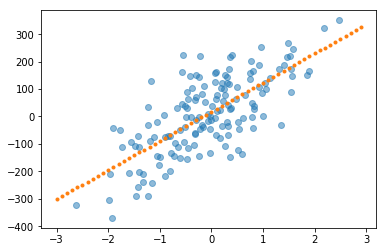

In [4]:
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x, y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3, 3, 0.1)
plt.plot(grid, best_fit(grid), '.')

Also see *sklearn.linear_model*

In [5]:
intercept

17.5726051322569

In [6]:
slope

106.23703373251959

## Using gradient descent

Our cost function is slightly altered version of the mean squared error (MSE): $\frac{1}{2 m} \sum_{i=1}^{m} (Y_i - \hat{Y_i})^2$

In [7]:
def MSE(pred_error, y):
    return np.sum(pred_error ** 2) / (2 * y.size)

def gradient_descent(x, y, theta_init, learning_rate=0.001, max_steps=0, precision=0.001):
    costs = []
    m = y.size
    theta = theta_init
    theta_history = [] # store thetas
    preds = []
    step = 0
    old_cost = 0
    
    pred = np.dot(x, theta)
    pred_error = pred - y
    current_cost = MSE(pred_error, y)
    
    preds.append(pred)
    costs.append(current_cost)
    theta_history.append(theta)
    step += 1
    while abs(current_cost - old_cost) > precision:
        
        old_cost = current_cost
        gradient = x.T.dot(pred_error) / m  # calculate the gradient using full dataset
        theta = theta - learning_rate * gradient  # update thetas
        theta_history.append(theta)
        
        pred = np.dot(x, theta)
        pred_error = pred - y
        current_cost = MSE(pred_error, y)
        costs.append(current_cost)
        
        if step % 25 == 0: preds.append(pred)
        step += 1
        if max_steps:
            if step == max_steps:
                break
        
    return theta_history, costs, preds, step

In [8]:
x_with_intercept_constant = np.c_[np.ones(x.shape[0]), x]
theta_init = [-30, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(x_with_intercept_constant, y, theta_init, learning_rate=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: 17.52, 106.14 76
Least Squares: 17.57, 106.24


Text(0.5,0.98,'GD - Minimize C(t1, t2)')

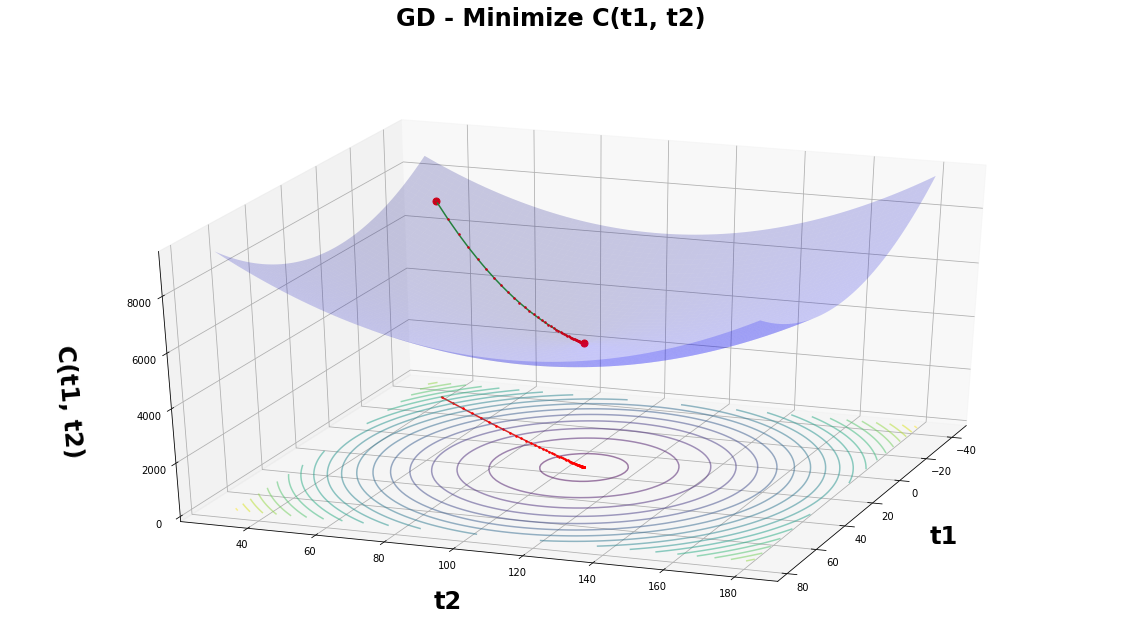

In [9]:
from mpl_toolkits.mplot3d import Axes3D

def vectorized_MSE(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2) / (2 * Y.size)

ms = np.linspace(theta[0] - 60, theta[0] + 60, 60)
bs = np.linspace(theta[1] - 75 , theta[1] + 75, 75)

M, B = np.meshgrid(ms, bs)

zs = np.array([vectorized_MSE(x_with_intercept_constant, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, alpha=0.5, offset=0, stride=30)

ax.set_xlabel('t1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('t2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('C(t1, t2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=30., azim=20)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=3)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=3)

fig.suptitle("GD - Minimize C(t1, t2)", fontsize=24, fontweight='bold')

Often Batch Gradient Descent is too expensive

Stochastic Gradient Descent
- Update thetas sequentially for every observation => high variance of costs

Mini-Batch Gradient Descent
- Update thetas after processing a batch of observations of a certain size

Further reading and examples:
- https://am207.github.io/2017/wiki/gradientdescent.html
- https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

## Appendix: SGD

In [10]:
def sgd(x, y, theta_init, learning_rate=0.001, max_steps=0, precision=0.001):
    costs = []
    m = y.size
    oldtheta = 0
    theta = theta_init
    history = []
    preds = []
    grads=[]
    step = 0
    old_cost = 0
    epoch = 0
    i = 0
    pred = np.dot(x[i,:], theta)
    error = pred - y[i]
    gradient = x[i,:].T * error
    grads.append(gradient)
    current_cost = np.sum(error ** 2) / 2
    step += 1
    preds.append(pred)
    cost_sum = current_cost
    costs.append(cost_sum / step)
    history.append(theta)
    while 1:
        gradient = x[i,:].T * error
        grads.append(gradient)
        oldtheta = theta
        theta = theta - learning_rate * gradient  # update
        history.append(theta)
        i += 1
        if i == m:
            epoch += 1
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            i = 0
        pred = np.dot(x[i,:], theta)
        error = pred - y[i]
        current_cost = np.sum(error ** 2) / 2
        
        if step % 25 == 0: preds.append(pred)
        step += 1
        cost_sum += current_cost
        old_cost = costs[step - 2]
        costs.append(cost_sum / step)
        if max_steps:
            if step == max_steps:
                break
        
    return history, costs, preds, grads, step, epoch

In [11]:
history2, cost2, preds2, grads2, iters2, epoch2 = sgd(x_with_intercept_constant, y, theta_init, max_steps=500, learning_rate=0.01)
print("Epochs: " + str(epoch2))
theta = history2[-1]
print("Stochastic Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Epochs: 3
Stochastic Gradient Descent: 20.24, 102.23 76
Least Squares: 17.57, 106.24


Text(0.5,0.98,'SGD - Minimize C(t1, t2)')

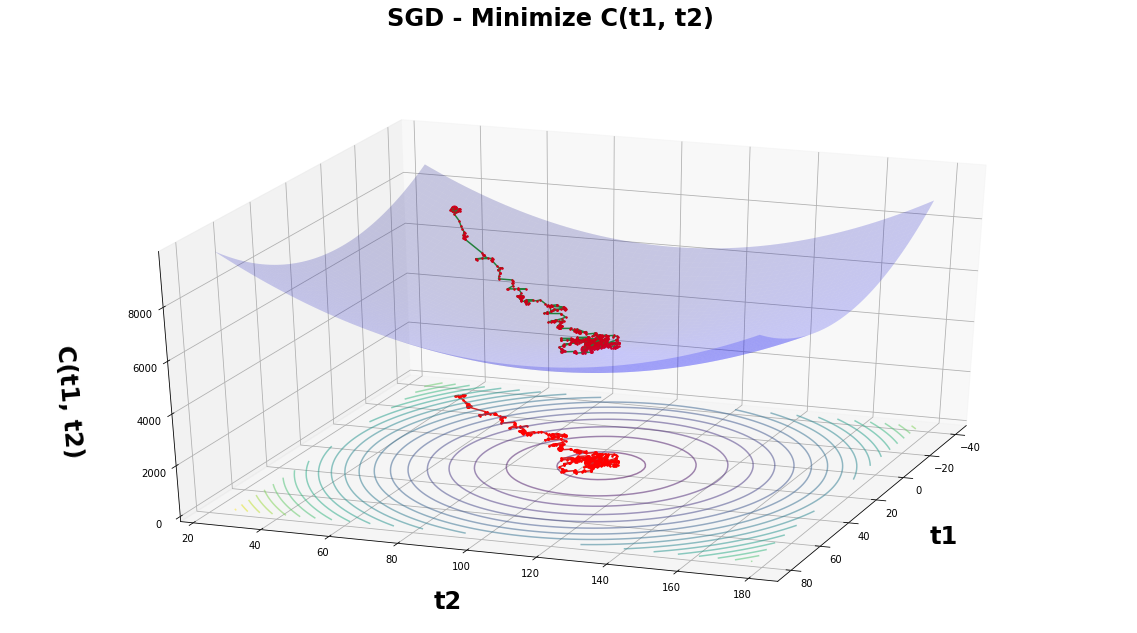

In [12]:
from mpl_toolkits.mplot3d import Axes3D

def vectorized_MSE(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2) / (2 * Y.size)

ms = np.linspace(theta[0] - 60, theta[0] + 60, 60)
bs = np.linspace(theta[1] - 75 , theta[1] + 75, 75)

M, B = np.meshgrid(ms, bs)

zs = np.array([vectorized_MSE(x_with_intercept_constant, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])

# calculate costs based on historical thetas
historical_costs = np.array([vectorized_MSE(x_with_intercept_constant, y, theta) for theta in history2])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, alpha=0.5, offset=0, stride=30)

ax.set_xlabel('t1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('t2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('C(t1, t2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=30., azim=20)
ax.plot([theta[0]], [theta[1]], [historical_costs[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history2[0][0]], [history2[0][1]], [historical_costs[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history2], [t[1] for t in history2], historical_costs , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=3)
ax.plot([t[0] for t in history2], [t[1] for t in history2], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=3)

fig.suptitle("SGD - Minimize C(t1, t2)", fontsize=24, fontweight='bold')